In [13]:
import pandas as pd
import numpy as np

# Loading the Dataset

In [14]:
df = pd.read_csv("/Users/kirtan/Downloads/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Droping Unnecessary Columns

In [15]:
df = df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring The Dataset

In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [19]:
LE = LabelEncoder()

In [21]:
df.iloc[:,-1] = LE.fit_transform(df.iloc[:,-1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Spliting Data

In [59]:
x = df.iloc[:,:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

# Train & Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [63]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [64]:
x_train.shape

(120, 4)

In [65]:
y_train.shape

(120,)

# Model Building

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier()

In [68]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Actual & Predicted Output

In [69]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [70]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

# Accuracy of the model

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_pred,y_test)*100

96.66666666666667

# Confusion Matrix of the model

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

# Classification Report of the model

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Visulization of the model

In [77]:
from sklearn import tree

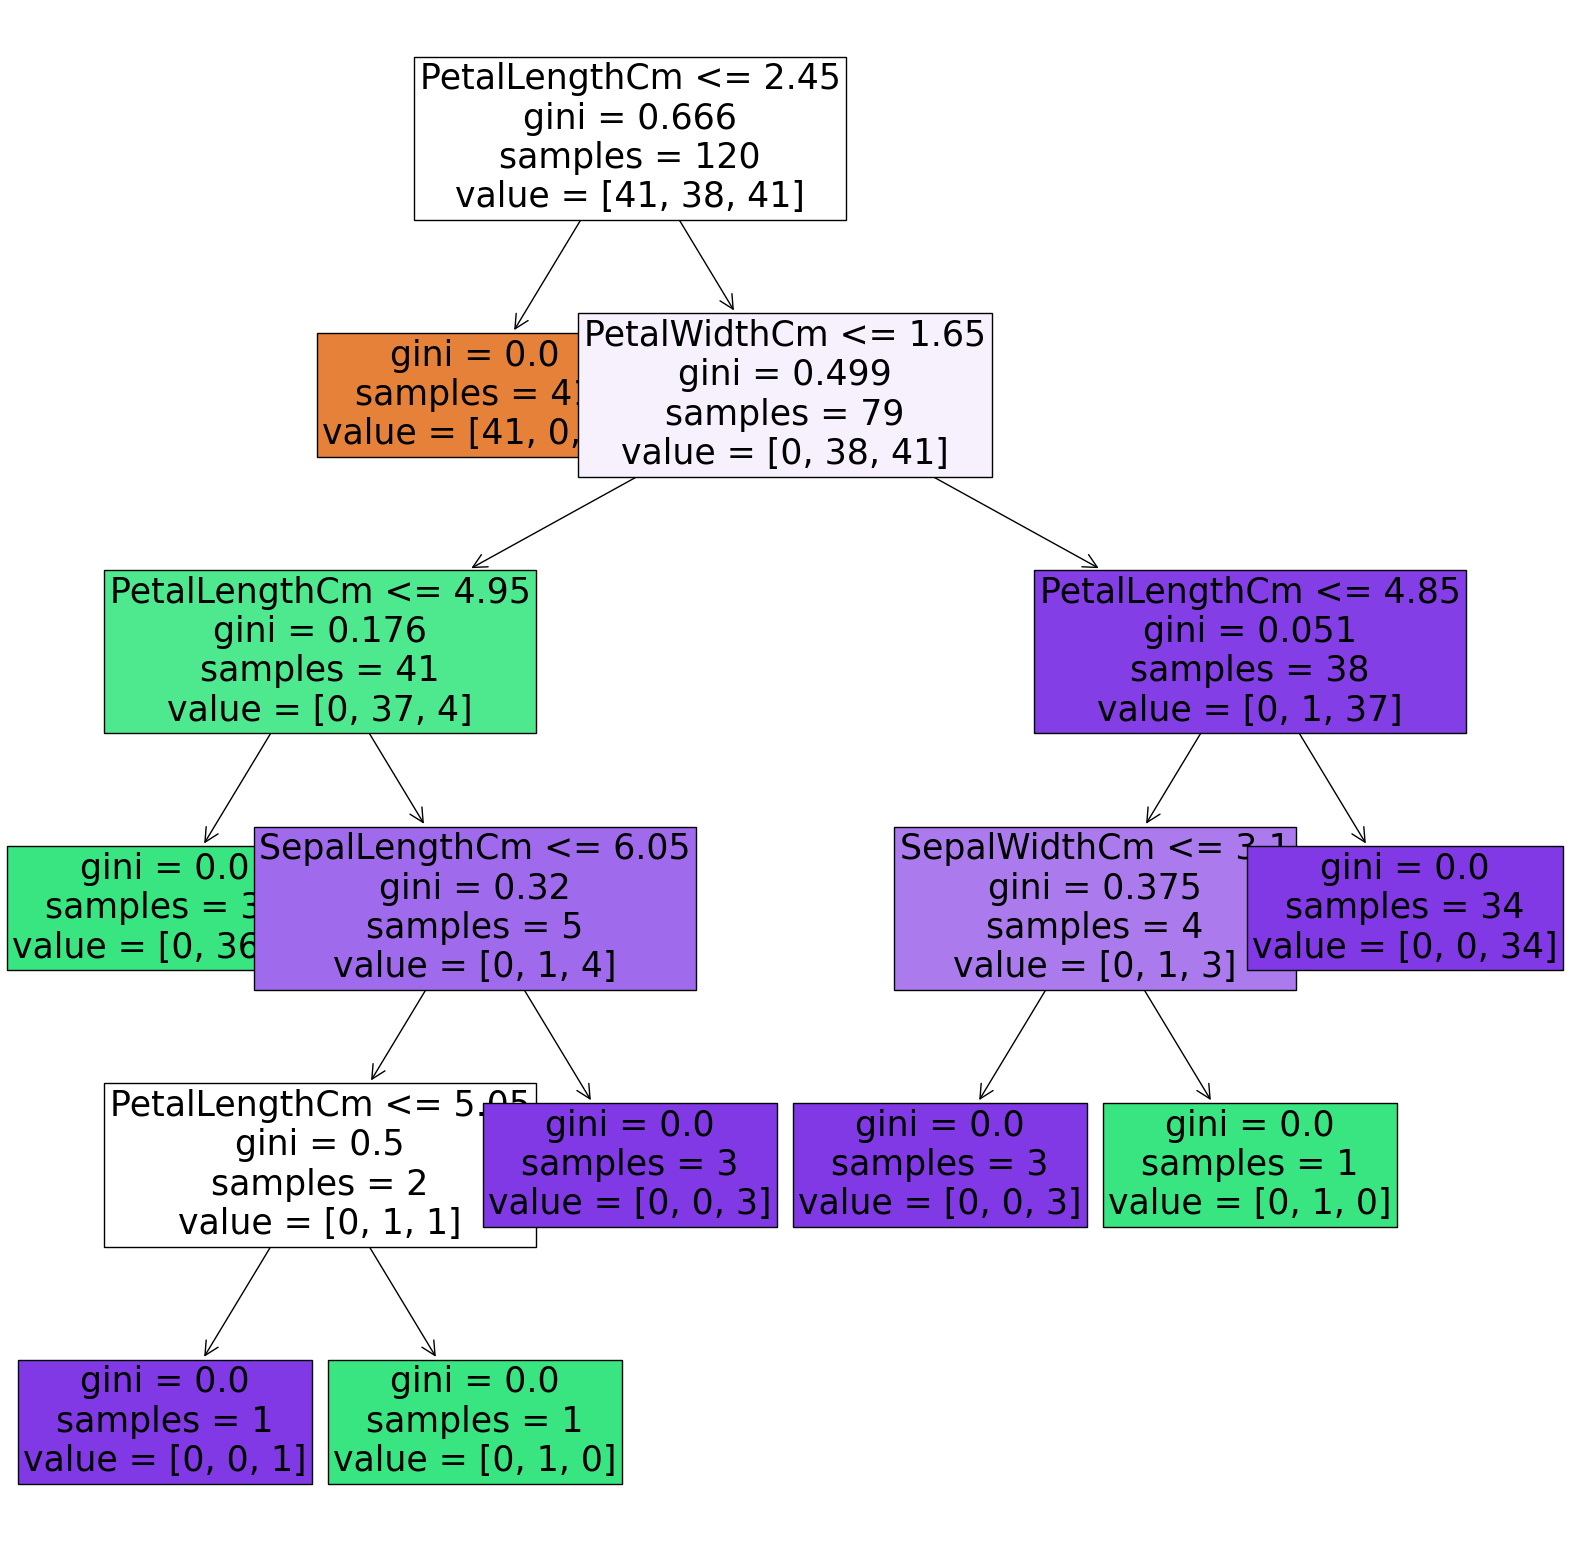

In [79]:
plt.figure(figsize=(20,20))
dtviz = tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=25)